<a href="https://colab.research.google.com/github/Nikkutan/Nikhil/blob/main/NIKHIL_CLARITY_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data manipulation

import pandas as pd
import numpy as np
from scipy import stats

#Data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

# Regression Modelling

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_excel('Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
df.duplicated().sum()

220

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df['journey_day']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
df['journey_month']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [ ]:
df['journey_year']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

In [ ]:
df['journey_year'].unique().sum()

2019

Here we can see that the year is only 2019. Hence we can now drop two coulmns journey year and date of journey

In [ ]:
df.drop(columns=['journey_year','Date_of_Journey'],inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [ ]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [ ]:
df['Arrival_Time'].unique().sum()

'01:10 22 Mar13:1504:25 10 Jun23:3021:3511:2510:25 13 Mar05:05 02 Mar19:1523:0022:5513:5509:20 10 May19:5019:15 04 Mar12:35 13 Jun19:15 13 Jun12:35 28 May19:2013:20 19 Mar06:5021:5008:15 07 May12:35 10 Jun03:35 02 Jun12:5512:3509:2023:1512:35 16 Jun21:0020:2016:4519:0018:1015:1519:00 19 May08:3511:05 16 May19:00 28 Jun14:1510:55 02 May01:10 28 Mar00:15 19 Jun02:45 04 Apr12:00 25 Mar23:5501:30 07 May16:45 07 Mar09:25 04 Apr01:30 16 May15:2515:3508:3008:15 13 Mar12:35 25 Jun10:0514:3007:5510:3512:00 10 Jun22:3504:40 07 May11:25 07 Mar07:2504:25 07 Jun20:4514:25 25 May22:3013:2023:2007:4022:5008:15 10 Jun04:25 25 Jun14:35 13 May08:5504:25 19 May18:5019:15 10 May19:00 25 May05:05 16 Mar09:05 13 May04:25 07 Mar09:25 07 Mar01:35 04 Mar09:4016:2510:05 07 May19:15 02 Mar11:10 22 May08:15 13 Jun12:00 07 May17:0504:25 16 Jun17:5023:1001:30 22 May19:15 28 Jun08:4501:30 10 Apr07:45 07 Jun16:1000:55 22 May23:35 22 May04:25 04 Jun20:0000:40 04 Apr18:50 22 Mar08:15 25 May07:55 10 May12:35 28 Jun21:45

In [ ]:
df["Arr_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arr_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [ ]:
df.drop(columns=['Arrival_Time','Dep_Time'],inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [ ]:
df[['Source','Destination','Route','Total_Stops']]

,Source,Destination,Route,Total_Stops
0,Banglore,New Delhi,BLR → DEL,non-stop
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop
...,...,...,...,...
10678,Kolkata,Banglore,CCU → BLR,non-stop
10679,Kolkata,Banglore,CCU → BLR,non-stop
10680,Banglore,Delhi,BLR → DEL,non-stop
10681,Banglore,New Delhi,BLR → DEL,non-stop


From this we can see that Route column can be deleted as the other three coulumns convey the same

In [ ]:
df.drop(columns=['Route'],inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [ ]:
df['Total_Stops'].unique().sum()

'non-stop2 stops1 stop3 stops4 stops'

In [ ]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop','0')

In [ ]:
df['Total_Stops'] = df['Total_Stops'].str.replace('stops','')
df['Total_Stops'] = df['Total_Stops'].str.replace('stop','')
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,5,50,13,15


In [ ]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df["Total_dur"] = df["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)

In [ ]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,5,50,13,15,7.416667


Now we get duration in hours

In [ ]:
df.drop(columns=['Duration'], inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7.416667


In [ ]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

EDA ON DATA

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_day', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Total_dur'],
      dtype='object')

Text(0.5, 1.0, 'Airline')

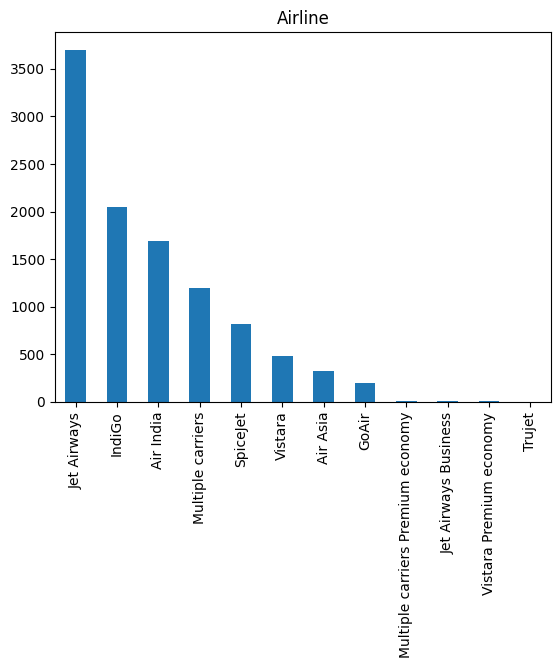

In [ ]:
df['Airline'].value_counts().plot(kind='bar')
plt.title('Airline')

Text(0.5, 1.0, 'Source')

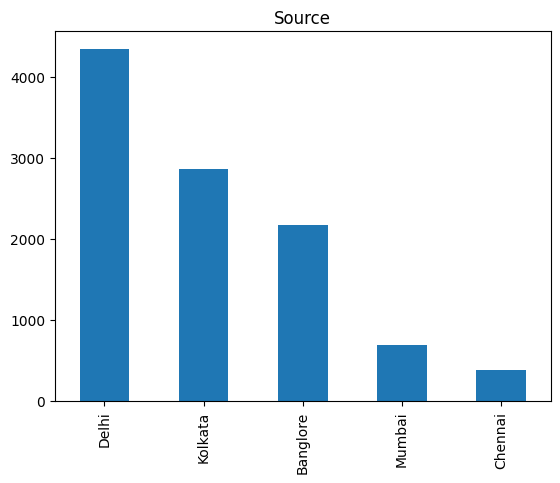

In [ ]:
df['Source'].value_counts().plot(kind='bar')
plt.title('Source')

Text(0.5, 1.0, 'Destination')

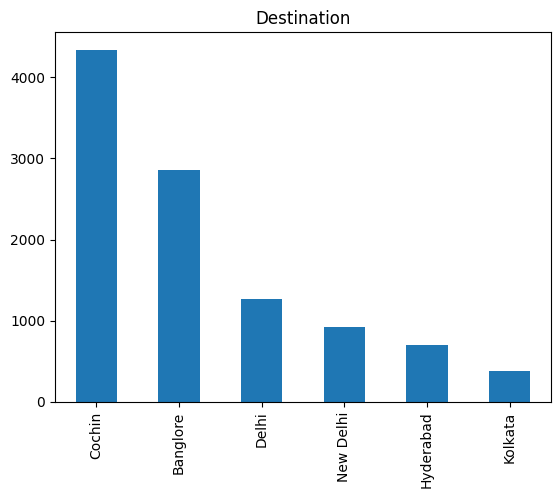

In [ ]:
df['Destination'].value_counts().plot(kind='bar')
plt.title('Destination')

Text(0.5, 1.0, 'Total_Stops')

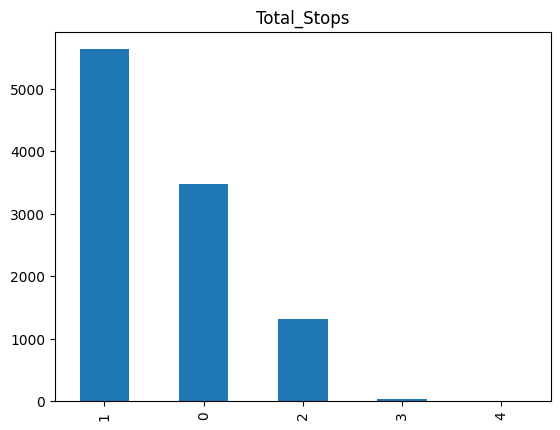

In [ ]:
df['Total_Stops'].value_counts().plot(kind='bar')
plt.title('Total_Stops')

Text(0.5, 1.0, 'Additional_Info')

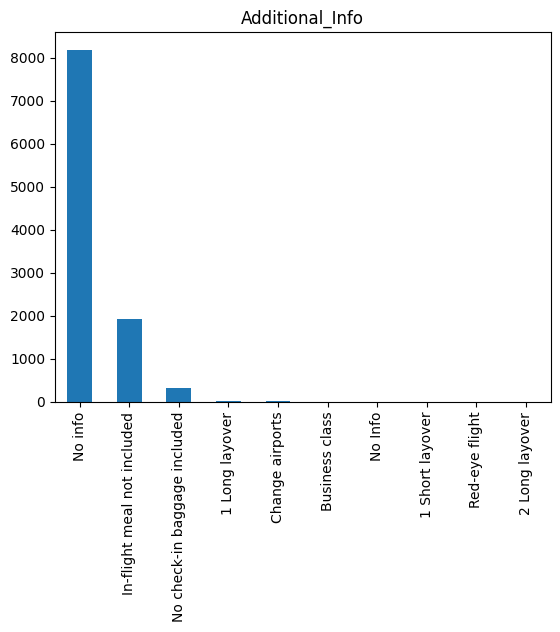

In [ ]:
df['Additional_Info'].value_counts().plot(kind='bar')
plt.title('Additional_Info')

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_day', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arr_hour', 'Arr_min', 'Total_dur'],
      dtype='object')

In [ ]:
A=df['Airline'].groupby(df['Airline']).count()
B=df['Airline'].groupby(df['Source']).count()
C=df['Airline'].groupby(df['Destination']).count()
D=df['Airline'].groupby(df['Total_Stops']).count()

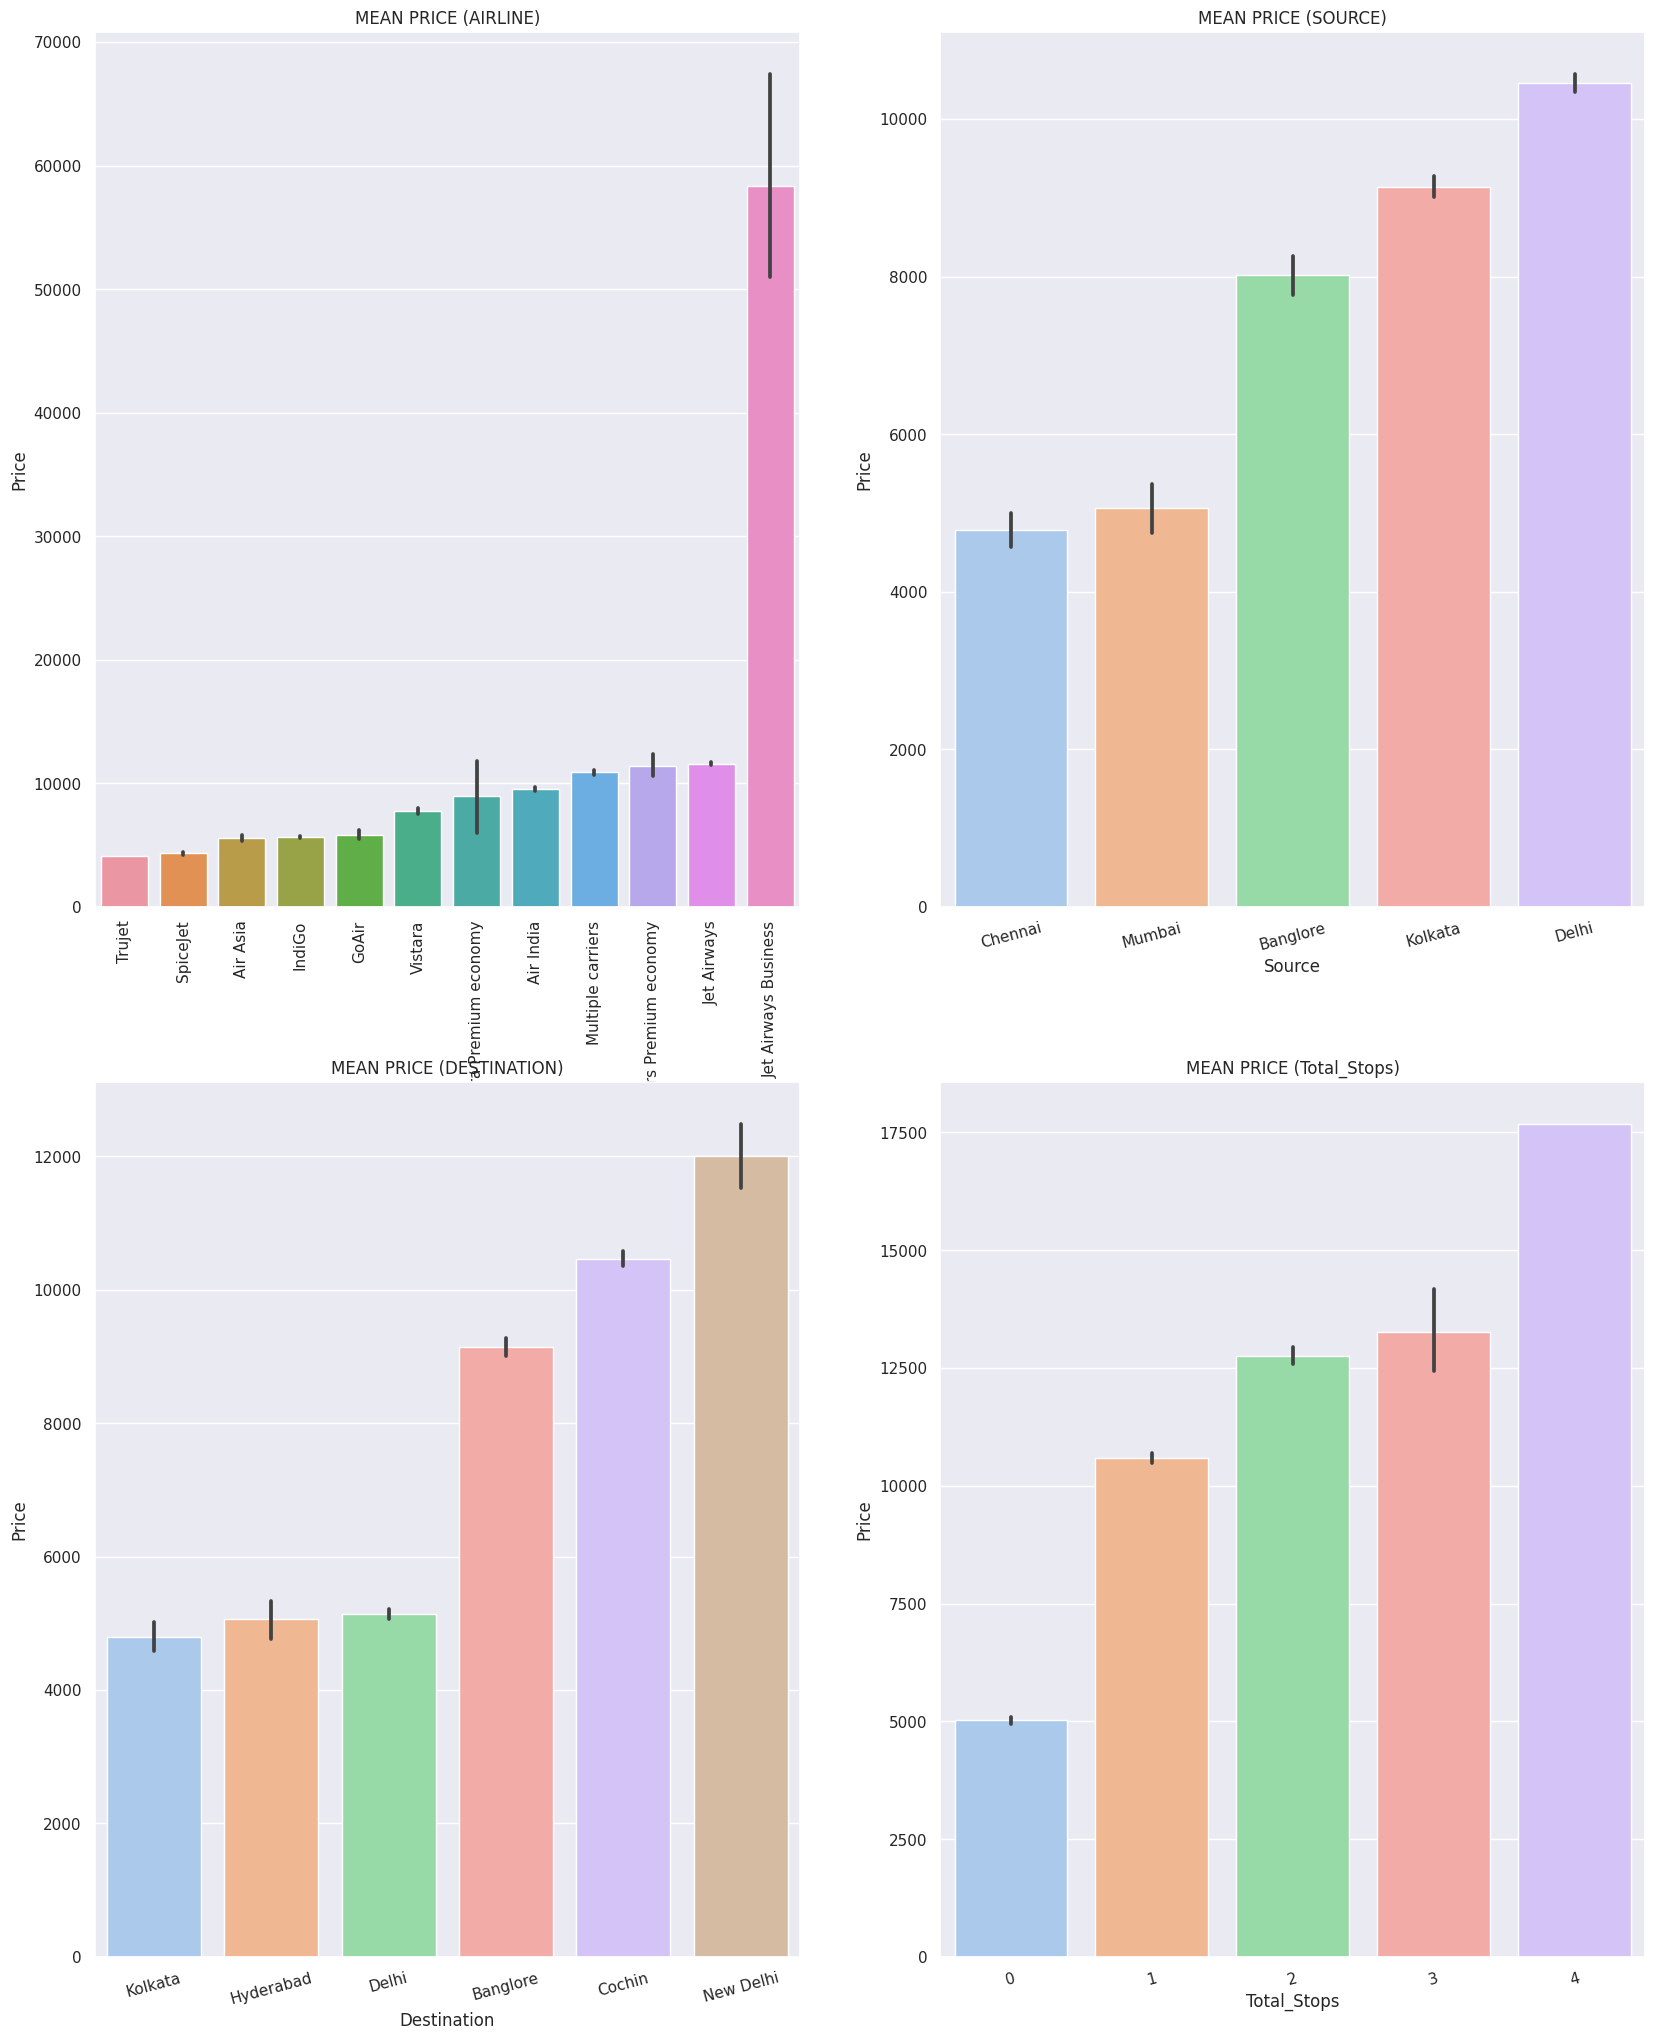

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,25))
plt.subplot(221)
sns.barplot(x='Airline',y='Price',data=df,order=df.groupby('Airline')['Price'].mean().reset_index().sort_values('Price')['Airline'])
plt.xticks(rotation=90)
plt.title('MEAN PRICE (AIRLINE)')
plt.subplot(222)
sns.barplot(x='Source',y='Price',data=df,order=df.groupby('Source')['Price'].mean().reset_index().sort_values('Price')['Source'])
plt.xticks(rotation=15)
plt.title('MEAN PRICE (SOURCE)')
plt.subplot(223)
sns.barplot(x='Destination',y='Price',data=df,order=df.groupby('Destination')['Price'].mean().reset_index().sort_values('Price')['Destination'])
plt.xticks(rotation=15)
plt.title('MEAN PRICE (DESTINATION)')
plt.subplot(224)
sns.barplot(x='Total_Stops',y='Price',data=df,order=df.groupby('Total_Stops')['Price'].mean().reset_index().sort_values('Price')['Total_Stops'])
plt.xticks(rotation=15)
plt.title('MEAN PRICE (Total_Stops)')

plt.show()

Following are the findings after EDA

*  Mean prices are in a range of up to 20000.
*  Jet Airways is the most frequent airline. However, Jet Airways Business has an mean price much higher than the other lines.
*  Delhi is where most flights depart from and has the highest mean price.
*  Cochin is the destination with the highest number of flights. However, New Delhi is the destination with the highest mean price.
*  A little more than half of the flights have only one stop and the greater the number of stops, the higher the mean price.
* In the information column, the vast majority do not contain information and the rest are not relevant to the model and hence the column can be dropped  

In [ ]:
df.drop(columns=['Additional_Info'],inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7.416667
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19.000000
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5.416667
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4.750000


<ipython-input-48-39587165d48a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='YlGnBu', square=True);


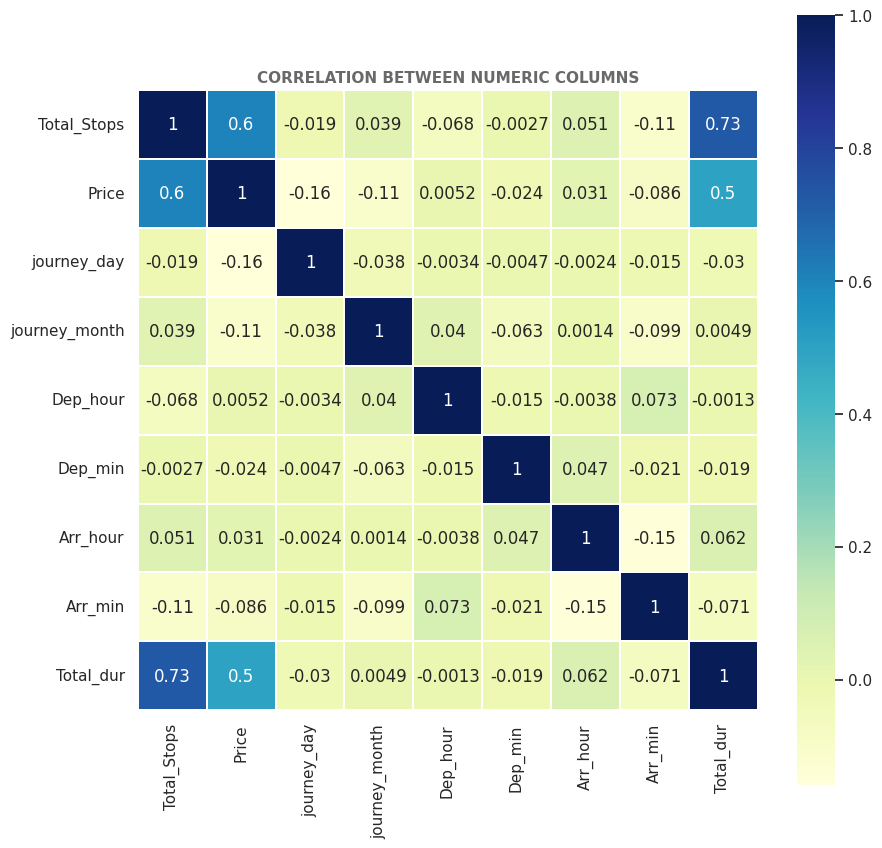

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='YlGnBu', square=True);
plt.title('CORRELATION BETWEEN NUMERIC COLUMNS', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.show()

From the correlation chart it is very clear that Totl duration and Total stops are higly correlated with 0.73. So we need to remove one of the columns, since it is a regression problem. Its better to drop Total stops column and to keep total duration as they both convey the same information.

In [ ]:
df.drop(columns=['Total_Stops'],inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7.416667
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19.000000
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5.416667
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4.750000


In [ ]:
df.dtypes

Airline           object
Source            object
Destination       object
Price              int64
journey_day        int64
journey_month      int64
Dep_hour           int64
Dep_min            int64
Arr_hour           int64
Arr_min            int64
Total_dur        float64
dtype: object

We’ll use one-hot encoding to handle the Airline, Source, Destination, variable because it’s Nominal Categorical Data (airline names have no order of any kind)

Nominal data used when data are not in any order .OneHotEncoder is used in this case

Ordinal data are data in order. LabelEncoder is used in this case

In [ ]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
data_train.dtypes

Price                                  int64
journey_day                            int64
journey_month                          int64
Dep_hour                               int64
Dep_min                                int64
Arr_hour                               int64
Arr_min                                int64
Total_dur                            float64
Air Asia                               uint8
Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Chennai                                uint8
Delhi                                  uint8
Kolkata   

In [ ]:
data_train.shape

(10462, 29)

# **Feature Selection**
Finding out the best feature which will contribute and have good relation with target variable.

In [ ]:
X= data_train.loc[:,data_train.columns!='Price']
X

,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,3,22,20,1,10,2.833333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,13,15,7.416667,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9,6,9,25,4,25,19.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12,5,18,5,23,30,5.416667,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,16,50,21,35,4.750000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2.500000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,27,4,20,45,23,20,2.583333,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10680,27,4,8,20,11,20,3.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,1,3,11,30,14,10,2.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=data_train.loc[:, "Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[1.45856820e-01 5.32493950e-02 3.00421998e-02 3.36375417e-02
 3.18776254e-02 2.80334010e-02 2.21147665e-01 2.91927114e-03
 2.86274947e-02 2.25612414e-03 7.55747080e-03 1.56049537e-01
 7.37220146e-02 2.09817958e-02 7.83989356e-04 1.81300775e-03
 3.99744268e-05 6.52208941e-03 7.24851670e-05 6.58290931e-04
 2.84571946e-02 4.14956990e-03 1.30790631e-02 2.25282870e-02
 4.03488250e-02 1.83061274e-02 5.81934907e-04 2.67008053e-02]


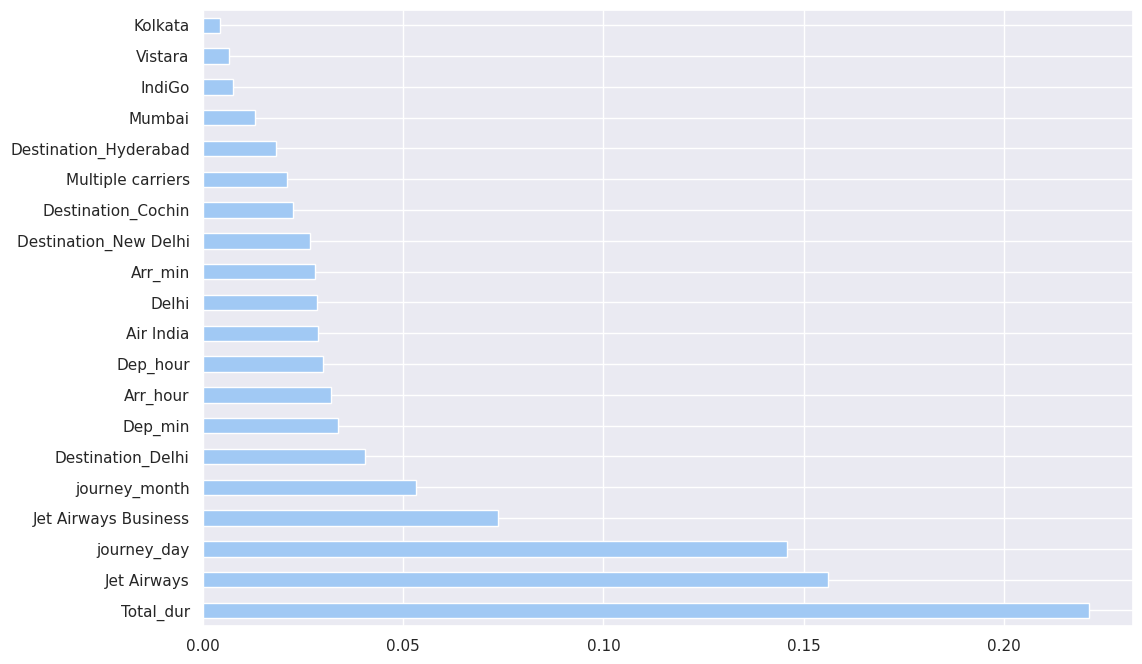

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


So it is clear that the features we selected is good to go and no need to drop further columns.

# Model Fitting

Split dataset into train and test set in order to prediction w.r.t X_test

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In [ ]:
d={}
def metrics_R2_score(actual,predicted,name):
  r2=r2_score(actual,predicted)
  d[name]=[r2]

def ml_model(X_test=None,y_test=None,model=None,name=''):
  predicted=model.predict(X_test)
  actual=y_test
  metrics_R2_score(actual,predicted,name)
  plt.figure(figsize=(15,10))
  plt.scatter(actual,predicted)
  p1 = max(max(predicted), max(actual))
  p2 = min(min(predicted), min(actual))

  plt.plot([p1,p2],[p1,p2])
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.title(name)
  plt.axis('equal')
  plt.show()

# Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_RF = RF.predict(X_test)

In [ ]:
y_pred_RF

array([10906.6       ,  6334.11      , 11657.92083333, ...,
       13694.915     ,  9657.04709524, 12049.92      ])

In [ ]:
RF.score(X_train, y_train)

0.9523769120821969

In [ ]:
RF.score(X_test, y_test)

0.7962889136923595

R2-Score : 0.7962889136923595


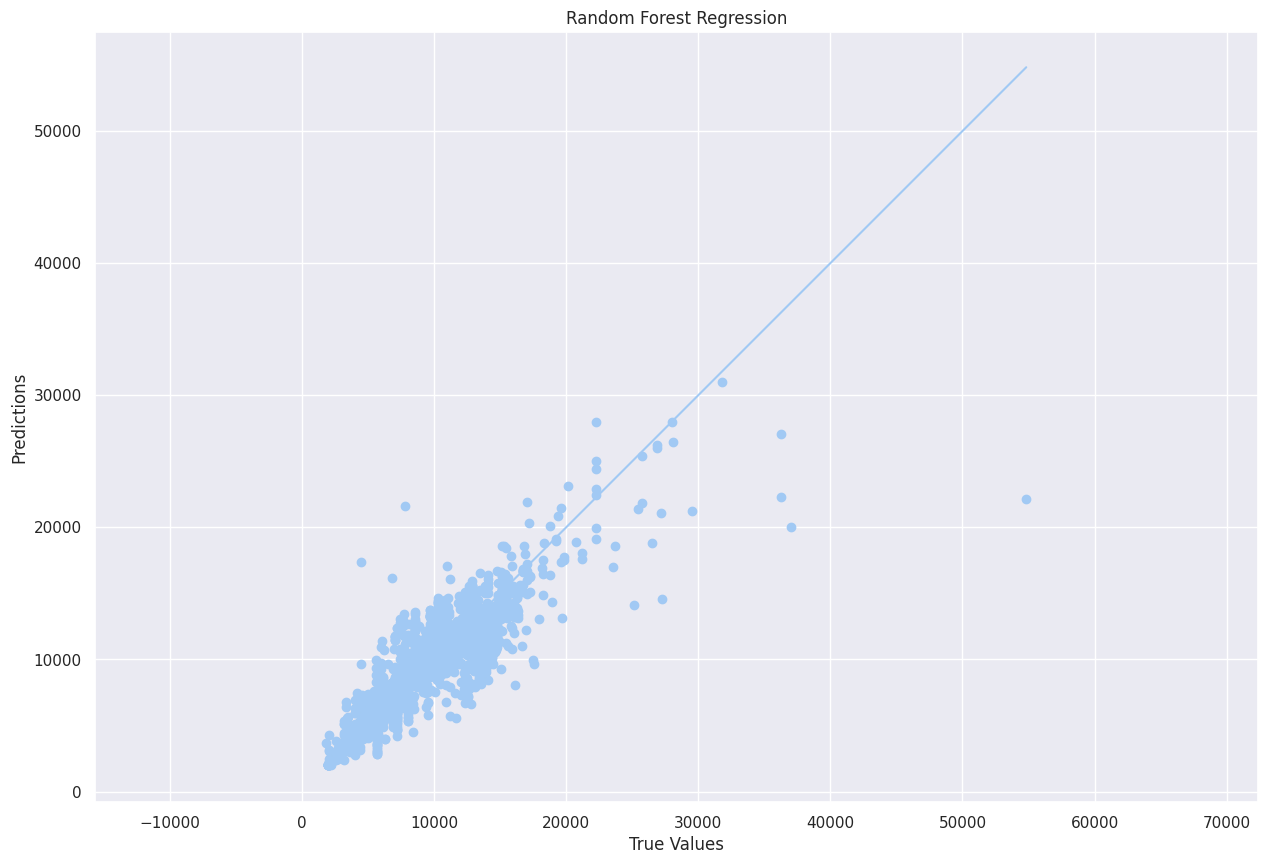

In [ ]:
print('R2-Score :',metrics.r2_score(y_test,y_pred_RF))
ml_model(X_test=X_test,y_test=y_test,model=RF,name="Random Forest Regression")

# **Linear** **Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [ ]:

y_pred_LR=LR.predict(X_test)
y_pred_LR


array([ 8361.13288364,  4877.64288193, 11381.07556395, ...,
       12341.60367818, 12874.72572296, 12380.46196797])

In [ ]:
LR.score(X_train, y_train)

0.5824551251446113

In [ ]:
LR.score(X_test, y_test)

0.5311066229057366

R2-Score : 0.5311066229057366


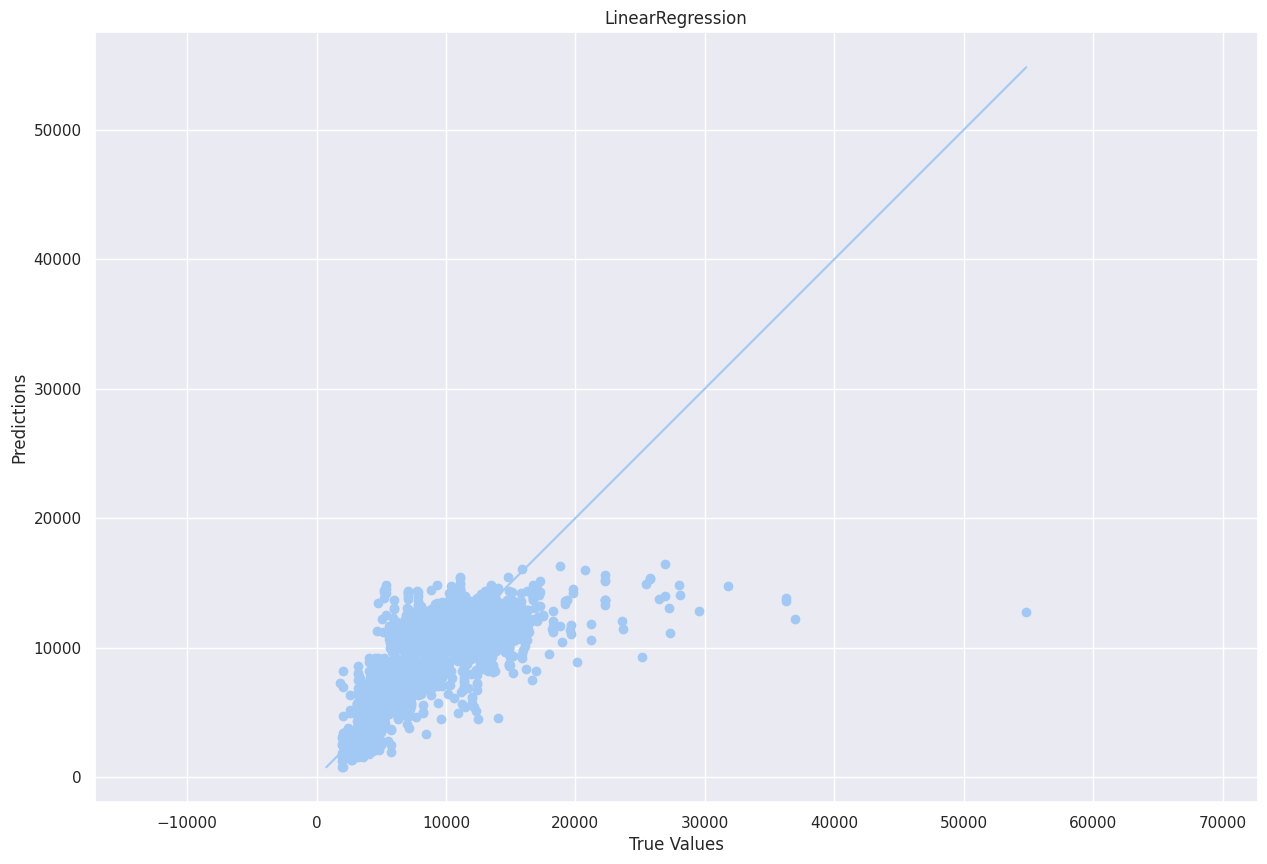

In [ ]:
print('R2-Score :',metrics.r2_score(y_test,y_pred_LR))
ml_model(X_test=X_test,y_test=y_test,model=LR,name="LinearRegression")


# **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_XGB=XGB.predict(X_test)
y_pred_XGB

array([11035.336,  6834.462, 11623.235, ..., 12457.642,  9828.852,
       12030.546], dtype=float32)

In [ ]:
XGB.score(X_train, y_train)

0.9293827339165169

In [ ]:
XGB.score(X_test, y_test)

0.818049435886866

R2-Score : 0.818049435886866


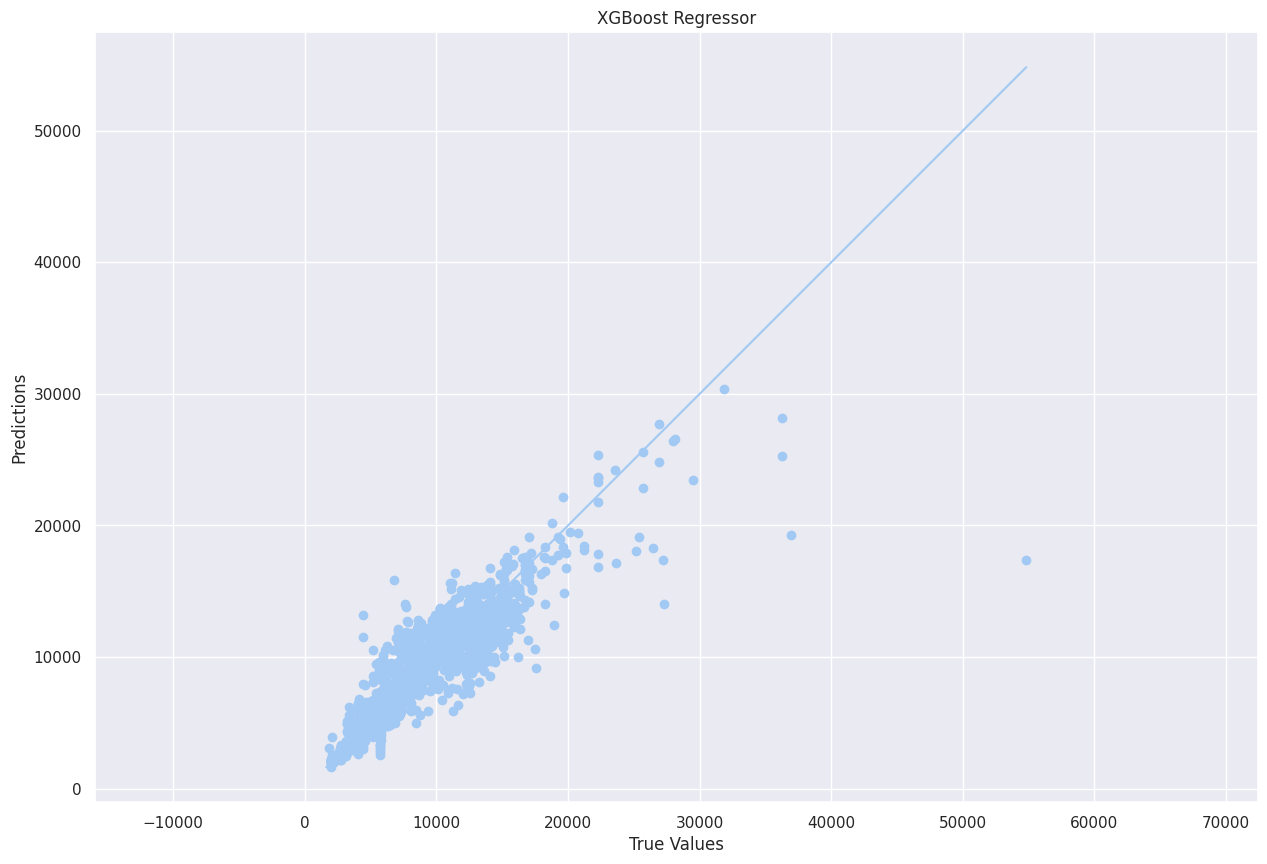

In [ ]:
print('R2-Score :',metrics.r2_score(y_test,y_pred_XGB))
ml_model(X_test=X_test,y_test=y_test,model=XGB,name="XGBoost Regressor")

### **Decision** **Tree**

In [ ]:

DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)



DecisionTreeRegressor()

R2-Score : 0.6644536864401798


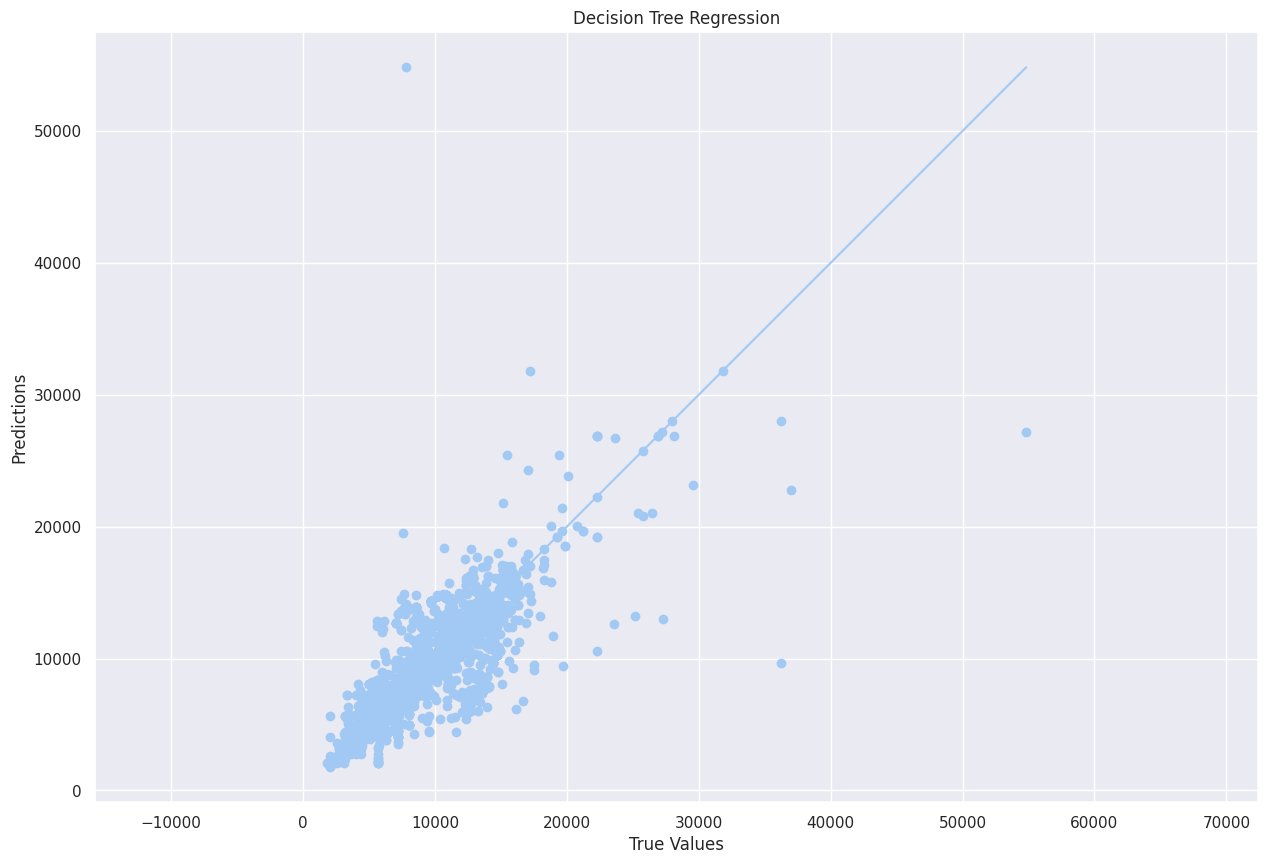

In [ ]:
y_pred_DT=DT.predict(X_test)
print('R2-Score :',metrics.r2_score(y_test,y_pred_DT))

ml_model(X_test=X_test,y_test=y_test,model=DT,name="Decision Tree Regression")

In [ ]:
final_result=pd.DataFrame(d,index=["R2"])
final_result

,Random Forest Regression,LinearRegression,XGBoost Regressor,Decision Tree Regression
R2,0.796289,0.531107,0.818049,0.664454


So the best R2 score is given by the XGBoost Regression model with a score of  0.818

In [ ]:
df1=pd.read_excel('Test_set.xlsx')

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
df1.duplicated().sum()
df1.drop_duplicates(inplace = True)
df1.isnull().sum()
df1.dropna(inplace=True)
df1['journey_day']=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.day


In [ ]:
df1['journey_month']=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.month
df1['journey_year']=pd.to_datetime(df1.Date_of_Journey, format="%d/%m/%Y").dt.year
df1.drop(columns=['journey_year','Date_of_Journey'],inplace=True)

df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

df1["Arr_hour"] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1["Arr_min"] = pd.to_datetime(df1['Arrival_Time']).dt.minute
df1.drop(columns=['Arrival_Time','Dep_Time'],inplace=True)

df1[['Source','Destination','Route','Total_Stops']]
df1.drop(columns=['Route'],inplace=True)

df1['Total_Stops'] = df1['Total_Stops'].str.replace('non-stop','0')
df1['Total_Stops'] = df1['Total_Stops'].str.replace('stops','')
df1['Total_Stops'] = df1['Total_Stops'].str.replace('stop','')
df1['Total_Stops'] = df1['Total_Stops'].astype(int)

df1["Total_dur"] = df1["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
df1.drop(columns=['Duration'], inplace=True)

df1.drop(columns=['Additional_Info'],inplace=True)
df1.drop(columns=['Total_Stops'],inplace=True)

Airline = df1[["Airline"]]
Airline = pd.get_dummies(df1['Airline'],drop_first=False)

Source = df1[["Source"]]
Source = pd.get_dummies(df1['Source'],drop_first=True)

Destination = df1[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

data_test=pd.concat([df1,Airline , Source, Destination],axis=1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [ ]:
data_test

,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,4,25,10.916667,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,0,23.750000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2.833333,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,6,6,20,30,20,25,23.916667,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2667,27,3,14,20,16,55,2.583333,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2668,6,3,21,50,4,25,6.583333,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2669,6,3,4,0,19,15,15.250000,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
X.columns

Index(['journey_day', 'journey_month', 'Dep_hour', 'Dep_min', 'Arr_hour',
       'Arr_min', 'Total_dur', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
data_test.columns

Index(['journey_day', 'journey_month', 'Dep_hour', 'Dep_min', 'Arr_hour',
       'Arr_min', 'Total_dur', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
median_Truejet = data_train['Trujet'].median()
data_test.insert(16,'Trujet',int(median_Truejet))

In [ ]:
data_test.head()

,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur,Air Asia,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,4,25,10.916667,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,10,20,4.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,19,0,23.750000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,21,0,13.000000,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,2,45,2.833333,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_Test_pred_XGB=XGB.predict(data_test)
y_Test_pred_XGB

array([11152.863 ,  4830.9287, 14790.747 , ..., 15484.849 , 13118.9375,
        7969.815 ], dtype=float32)

In [ ]:
df1

,Airline,Source,Destination,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,Jet Airways,Delhi,Cochin,6,6,17,30,4,25,10.916667
1,IndiGo,Kolkata,Banglore,12,5,6,20,10,20,4.000000
2,Jet Airways,Delhi,Cochin,21,5,19,15,19,0,23.750000
3,Multiple carriers,Delhi,Cochin,21,5,8,0,21,0,13.000000
4,Air Asia,Banglore,Delhi,24,6,23,55,2,45,2.833333
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,6,6,20,30,20,25,23.916667
2667,IndiGo,Kolkata,Banglore,27,3,14,20,16,55,2.583333
2668,Jet Airways,Delhi,Cochin,6,3,21,50,4,25,6.583333
2669,Air India,Delhi,Cochin,6,3,4,0,19,15,15.250000


In [ ]:
df1['Predicted_Price'] = y_Test_pred_XGB
df1

,Airline,Source,Destination,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur,Predicted_Price
0,Jet Airways,Delhi,Cochin,6,6,17,30,4,25,10.916667,11152.863281
1,IndiGo,Kolkata,Banglore,12,5,6,20,10,20,4.000000,4830.928711
2,Jet Airways,Delhi,Cochin,21,5,19,15,19,0,23.750000,14790.747070
3,Multiple carriers,Delhi,Cochin,21,5,8,0,21,0,13.000000,10791.989258
4,Air Asia,Banglore,Delhi,24,6,23,55,2,45,2.833333,3775.428467
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,6,6,20,30,20,25,23.916667,10921.807617
2667,IndiGo,Kolkata,Banglore,27,3,14,20,16,55,2.583333,5016.453613
2668,Jet Airways,Delhi,Cochin,6,3,21,50,4,25,6.583333,15484.848633
2669,Air India,Delhi,Cochin,6,3,4,0,19,15,15.250000,13118.937500


In [ ]:
df1.to_excel('Predicted_Flight_Price.xlsx', index=False)

In [ ]:
df

,Airline,Source,Destination,Price,journey_day,journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Total_dur
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2.833333
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7.416667
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19.000000
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5.416667
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4.750000
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,4,19,55,22,25,2.500000
10679,Air India,Kolkata,Banglore,4145,27,4,20,45,23,20,2.583333
10680,Jet Airways,Banglore,Delhi,7229,27,4,8,20,11,20,3.000000
10681,Vistara,Banglore,New Delhi,12648,1,3,11,30,14,10,2.666667


# **Conclusion**
For the above project, I have done the cleaning of the data, removed the duplicates, done the data preprocessing, and found the correlation between various features which aided in the determination of the flight price.

After dropping the unwanted columns,the data is encoded and then split into training and testing. With different machine learning algorithms such as Random Forest Regressor, Linear Regression, Decision Tree Regressor, XGBoost Regressor,the model is trained and the model with the best R2 Score(XGBoost Regressor) of 0.818 is selected to predict the flight price of the test data after the preproccessing of the test data. The final predicted result is added as a new column to the dataframe and saved as a new excel file.

As domestic air travel is getting more and more popular these days in India with various air ticket booking channels coming up online, travellers are trying to understand how these airline companies make decisions regarding ticket prices over time.So my model with a score of 82% accuracy will help to predict the flight fare.